In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
train.shape

(30000, 24)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [7]:
test.shape

(20000, 23)

In [8]:
test.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Customer ID                    30000 non-null object
Name                           30000 non-null object
Gender                         29947 non-null object
Age                            30000 non-null int64
Income (USD)                   25424 non-null float64
Income Stability               28317 non-null object
Profession                     30000 non-null object
Type of Employment             22730 non-null object
Location                       30000 non-null object
Loan Amount Request (USD)      30000 non-null float64
Current Loan Expenses (USD)    29828 non-null float64
Expense Type 1                 30000 non-null object
Expense Type 2                 30000 non-null object
Dependents                     27507 non-null float64
Credit Score                   28297 non-null float64
No. of Defaults                30000 non-null int64
Has Active Credit Card         28434 non

In [10]:
x = ['Gender', 'Income Stability', 'Type of Employment', 'Has Active Credit Card', 'Property Location']
for i in x:
    train[i] = train[i].fillna(train[i].value_counts().index[0])
    test[i] = test[i].fillna(test[i].value_counts().index[0])

In [11]:
x = ['Income (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age']
for i in x:
    train[i] = train[i].fillna(train[i].mean())
    test[i] = test[i].fillna(test[i].mean())

In [12]:
train['Dependents'] = train['Dependents'].fillna(2.0)
test['Dependents'] = test['Dependents'].fillna(2.0)

In [13]:
train['Dependents'] = train['Dependents']/365
test['Dependents'] = test['Dependents']/365

In [14]:
train['Loan Sanction Amount (USD)'] = train['Loan Sanction Amount (USD)'].fillna(train['Loan Sanction Amount (USD)'].mean())

In [15]:
train.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [16]:
test.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [21]:
newtrain = train.drop(['Customer ID', 'Name', 'Property ID'], axis = 1)
newtest = test.drop(['Customer ID', 'Name', 'Property ID'], axis = 1)

In [22]:
categorical_features = newtrain.select_dtypes(include= 'object')
categorical_features.columns

Index(['Gender', 'Income Stability', 'Profession', 'Type of Employment',
       'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

In [23]:
x = categorical_features.columns
x

Index(['Gender', 'Income Stability', 'Profession', 'Type of Employment',
       'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [79]:
newtest['Co-Applicant'] = newtest['Co-Applicant'].replace({'?': 1})
newtest['Co-Applicant'] = newtest['Co-Applicant'].astype(int)

In [80]:
newtest['Co-Applicant'].value_counts()

1    17081
0     2919
Name: Co-Applicant, dtype: int64

In [82]:
newtest['Property Price'] = newtest['Property Price'].replace({'?': 0})
newtest['Property Price'] = newtest['Property Price'].astype(float)

In [83]:
newtest['Property Price'] = newtest['Property Price'].replace({0: newtest['Property Price'].mean()})

In [26]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
Gender                         30000 non-null int32
Age                            30000 non-null int64
Income (USD)                   30000 non-null float64
Income Stability               30000 non-null int32
Profession                     30000 non-null int32
Type of Employment             30000 non-null int32
Location                       30000 non-null int32
Loan Amount Request (USD)      30000 non-null float64
Current Loan Expenses (USD)    30000 non-null float64
Expense Type 1                 30000 non-null int32
Expense Type 2                 30000 non-null int32
Dependents                     30000 non-null float64
Credit Score                   30000 non-null float64
No. of Defaults                30000 non-null int64
Has Active Credit Card         30000 non-null int32
Property Age                   30000 non-null float64
Property Type                  30000 non-null i

In [84]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
Gender                         20000 non-null int32
Age                            20000 non-null int64
Income (USD)                   20000 non-null float64
Income Stability               20000 non-null int32
Profession                     20000 non-null int32
Type of Employment             20000 non-null int32
Location                       20000 non-null int32
Loan Amount Request (USD)      20000 non-null float64
Current Loan Expenses (USD)    20000 non-null float64
Expense Type 1                 20000 non-null int32
Expense Type 2                 20000 non-null int32
Dependents                     20000 non-null float64
Credit Score                   20000 non-null float64
No. of Defaults                20000 non-null int64
Has Active Credit Card         20000 non-null int32
Property Age                   20000 non-null float64
Property Type                  20000 non-null i

In [27]:
from sklearn.metrics import mean_squared_error

In [38]:
x = newtrain.drop('Loan Sanction Amount (USD)', axis = 1)
y = newtrain['Loan Sanction Amount (USD)']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [48]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

23153.68810757993


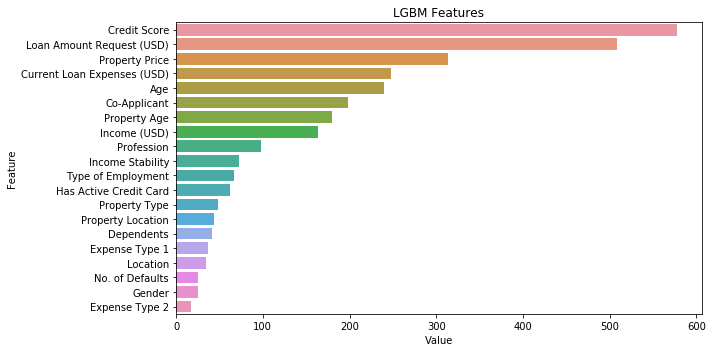

In [49]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [85]:
x_train = newtrain.drop('Loan Sanction Amount (USD)', axis = 1)
y_train = newtrain['Loan Sanction Amount (USD)']
x_test = newtest

In [86]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Customer ID': test['Customer ID'], 'Loan Sanction Amount (USD)' : y_pred})
solution.to_csv('Solution.csv', index = False)